# 1) Delivery_time -> Predict delivery time using sorting time 


In [1]:
# importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# load the data
data = pd.read_csv('delivery_time.csv')
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

## Data Visualization

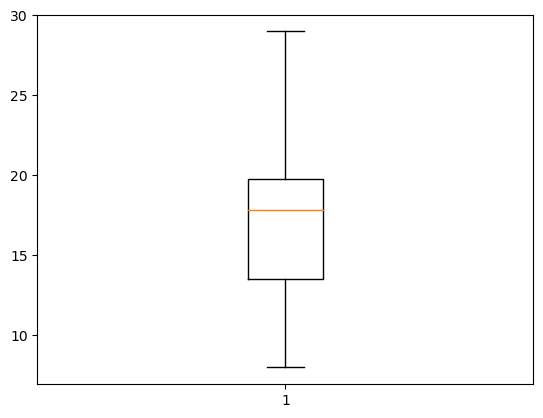

In [6]:
plt.boxplot(data.Delivery_Time)
plt.show()

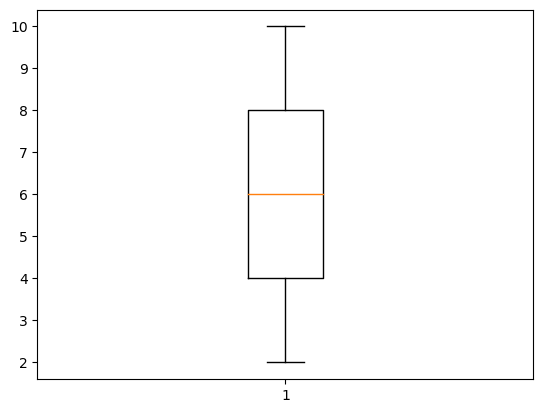

In [7]:
plt.boxplot(data.Sorting_Time)
plt.show()

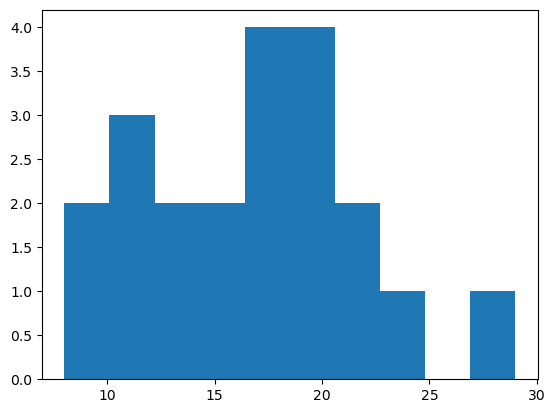

In [8]:
plt.hist(data.Delivery_Time)
plt.show()

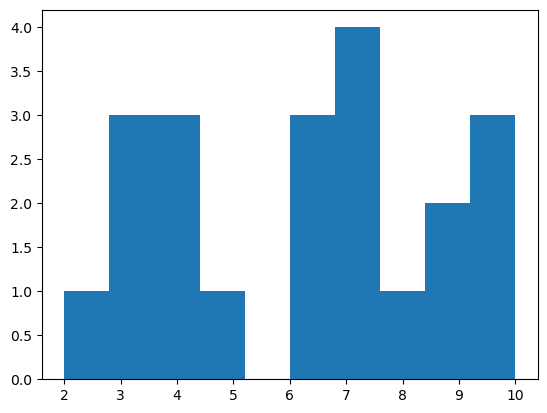

In [9]:
plt.hist(data.Sorting_Time)
plt.show()

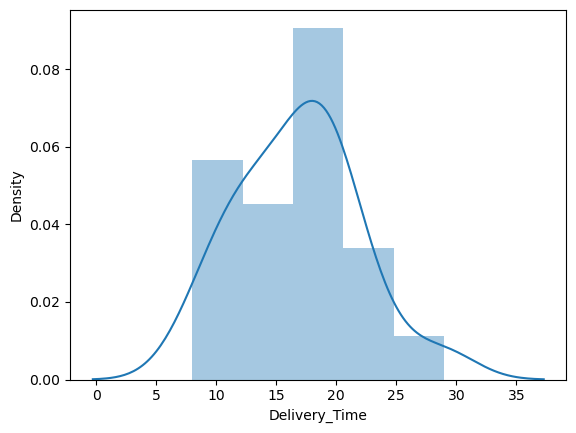

In [10]:
import warnings
warnings.filterwarnings('ignore')
sn.distplot(data['Delivery_Time'])
plt.show()

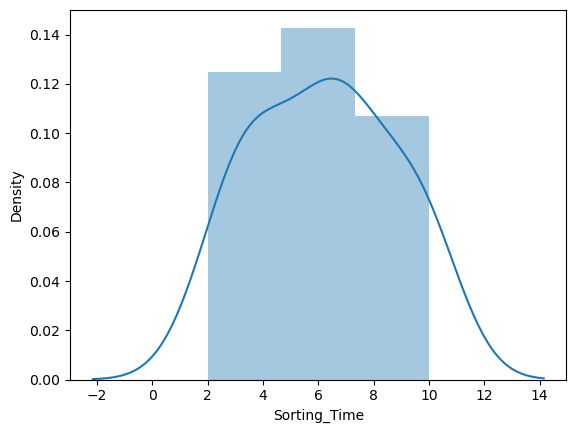

In [11]:
sn.distplot(data['Sorting_Time'])
plt.show()

Text(0.5, 1.0, 'scatterplot')

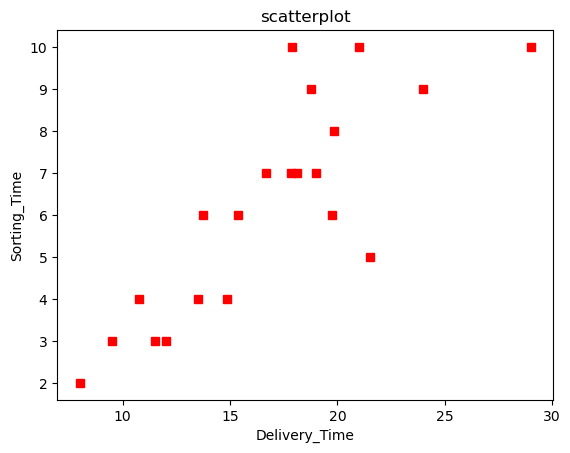

In [12]:
plt.plot(data.Delivery_Time, data.Sorting_Time, "rs")
plt.xlabel("Delivery_Time") 
plt.ylabel("Sorting_Time") 
plt.title("scatterplot")

## Correlation Analysis

In [13]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


## Model Building

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time", data=data).fit()

In [15]:
model.params 

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        17:47:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.resid 

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [18]:
pred = model.predict(data,['Delivery_Time'])
pred 

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [19]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [20]:
# root mean squared error
rmse_lin = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred))**2))
rmse_lin

10.722052392104557

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

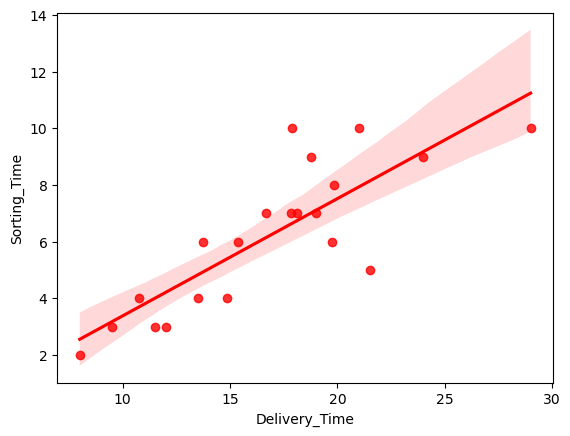

In [21]:
sn.regplot(x=data['Delivery_Time'],y=data['Sorting_Time'],color='r')

In [22]:
model2 = smf.ols('Sorting_Time~np.log(Delivery_Time)', data=data).fit()
model2.params

Intercept               -12.499233
np.log(Delivery_Time)     6.735548
dtype: float64

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        17:47:25   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model2.resid

0     1.992704
1    -1.031310
2    -1.593942
3     0.093297
4    -0.181351
5     0.103672
6    -0.333179
7     0.335548
8     3.068518
9     1.756035
10    0.378830
11    0.502940
12    0.543982
13   -0.951314
14   -1.254794
15   -1.686869
16    0.845099
17   -0.010043
18    0.493053
19    0.094910
20   -3.165786
dtype: float64

In [25]:
pred2 = model2.predict(data.Delivery_Time)
pred2 

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [26]:
model2.resid_pearson

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

In [27]:
rmse_log = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred2))**2))
rmse_log   

1.3337477286899517

Text(0, 0.5, 'Sorting_Time')

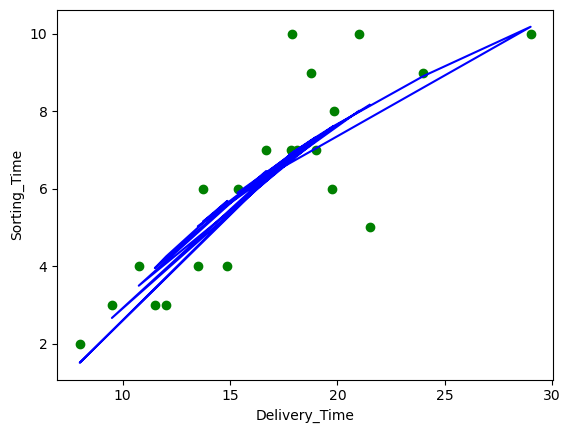

In [28]:
plt.scatter(x=data['Delivery_Time'],y=data['Sorting_Time'],color='green')
plt.plot(data['Delivery_Time'],pred2,color='blue')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time') 

In [29]:
# exponential model
model3 = smf.ols('np.log(Sorting_Time)~Delivery_Time', data=data).fit()
model3.params

Intercept        0.437237
Delivery_Time    0.076901
dtype: float64

In [30]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Mon, 09 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                          17:47:26   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model3.resid

0     0.250437
1    -0.089100
2    -0.164263
3    -0.085625
4    -0.364767
5     0.174099
6     0.047563
7    -0.069179
8     0.488829
9     0.318103
10    0.117267
11    0.122377
12    0.225972
13   -0.222981
14   -0.263738
15   -0.195222
16    0.297140
17    0.116005
18   -0.359294
19    0.137537
20   -0.481160
dtype: float64

In [32]:
pred_log = model3.predict(data.Delivery_Time)
pred_log 

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [33]:
pred3 = np.exp(pred_log)
pred3 

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [34]:
model3.resid_pearson

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

In [35]:
rmse_exp = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred3))**2)) 
rmse_exp 

1.7921450016869787

Text(0, 0.5, 'Sorting_Time')

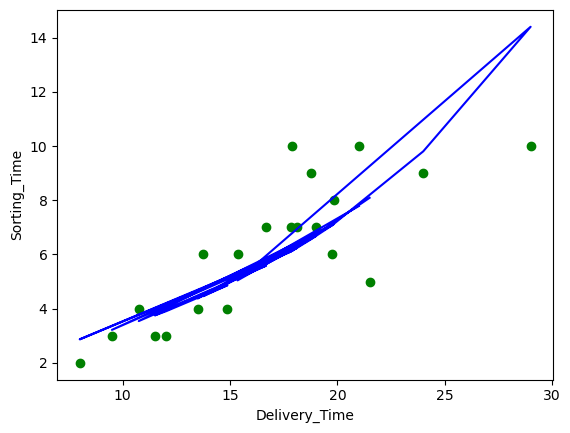

In [36]:
plt.scatter(x=data['Delivery_Time'],y=data['Sorting_Time'],color='green')
plt.plot(data.Delivery_Time,pred3,color='blue')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time') 

In [37]:
data["Delivery_Time_sq"] = data.Delivery_Time*data.Delivery_Time
data 

,Delivery_Time,Sorting_Time,Delivery_Time_sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [38]:
model_quad = smf.ols("np.log(Sorting_Time)~Delivery_Time + Delivery_Time_sq", data=data).fit()


In [39]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Mon, 09 Jan 2023   Prob (F-statistic):           6.77e-07
Time:                          17:47:26   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time        0.2272      0.052      4.346      0.000       0.117       0.337
Delivery_Time_sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
pred_quad = model_quad.predict(data)
pred4=np.exp(pred_quad)  
pred4


0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [41]:
rmse_quad = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred4))**2))
rmse_quad 

1.3471419800255744

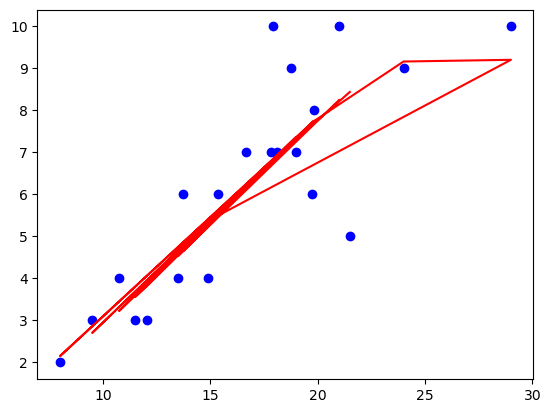

In [42]:
plt.scatter(data.Delivery_Time,data.Sorting_Time,c="b")
plt.plot(data.Delivery_Time,pred4,"r") 

In [43]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic') 

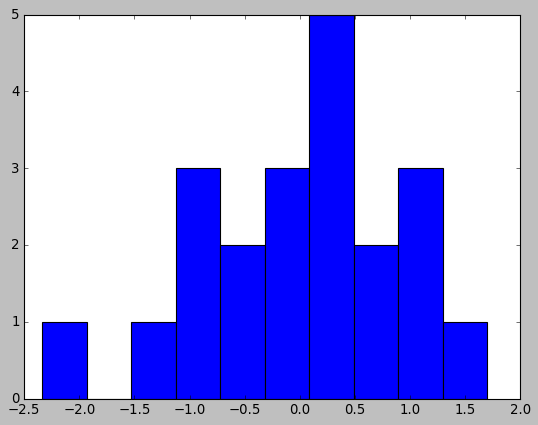

In [44]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [45]:
data2 = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data2)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,10.722052,0.682271
1,rmse_log,1.333748,0.710948
2,rmse_exp,1.792145,0.695443
3,rmse_quad,1.347142,0.793693


### By comparing RMSE , Rsquares and AIC/BIC values of all the models,
### It is clear that model_quad has high Rsquare value and low RMSE and AIC/BIC;
## Hence model_quad is the best suitable model for given problem.